## Telecom Churn - Hackathon Case Study

### [1] Understanding Data

In [1]:
# Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
data = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)

In [3]:
data

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,Na

In [4]:
# Dropping `id` as being a numerical count for listing purposes only. Dropping circle_id as it represents the network operator Id.
train = data.drop(columns=['id', 'circle_id'], axis=1)
# Popping out churn_probability as the target
y = train.pop('churn_probability')

In [5]:
train

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00
1,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.00,352.91,0.00,

In [6]:
train.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000

In [7]:
y.value_counts()

churn_probability
0    62867
1     7132
Name: count, dtype: int64

### [2] Cleaning Data

Dropping columns with unique values

In [8]:
for col in train:
    if train[col].nunique() == 1:
        del train[col]
train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.00,352.91,0.00,0.00,3.96,0.00,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.00,0.00,0.00
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,28.94,84.99,0.00,0.00,0

Handling missing values

In [9]:
train.isna().sum().sum()

1813532

Checking where the 1.8M null values are present

In [10]:
#percentage of na values (non zero) in differend columns
col_list = list(train)
na = []
for i in train.isna().sum()*100/train.shape[0]:
    na.append(i)
data = {'cols': col_list, '% na': na}
train_na = pd.DataFrame(data)
train_na[train_na['% na'] != 0]

,cols,% na
3,onnet_mou_6,3.954342
4,onnet_mou_7,3.838626
5,onnet_mou_8,5.290076
6,offnet_mou_6,3.954342
7,offnet_mou_7,3.838626
...,...,...
136,night_pck_user_7,74.478207
137,night_pck_user_8,73.689624
150,fb_user_6,74.902499
151,fb_user_7,74.478207


In [11]:
# Counting columns with null values higher than 70% to drop
null_cols = train_na[(train_na['% na'] >= 70)]
null_cols = null_cols[['cols']]
null_cols.cols.count()

30

In [12]:
# Dropping those columns
train = train.drop(null_cols.cols.values, axis=1)
train.columns.value_counts


<bound method IndexOpsMixin.value_counts of Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=127)>

In [13]:
# Checking number of null values again
train.isnull().sum().sum()

252062

In [14]:
# Sorting columns with null values to see the highest
col_list = list(train)
na = []
for i in train.isna().sum()*100/train.shape[0]:
    na.append(i)
data = {'cols': col_list, '% na': na}
train_na = pd.DataFrame(data)
train_na[train_na['% na'] != 0].sort_values(ascending=False, by='% na')

,cols,% na
23,loc_og_t2f_mou_8,5.290076
20,loc_og_t2m_mou_8,5.290076
41,std_og_mou_8,5.290076
50,og_others_8,5.290076
38,std_og_t2f_mou_8,5.290076
...,...,...
67,std_ic_t2t_mou_7,3.838626
4,onnet_mou_7,3.838626
101,date_of_last_rech_8,3.515765
100,date_of_last_rech_7,1.762882


Filling the columns with null values with relevant data

In [15]:
for col in train:
    # filling float with median
    if train[col].dtype == 'float':
        train[col] = train[col].fillna(train[col].median())
    # filling integer with mean    
    if train[col].dtype == 'int':
        train[col] = train[col].fillna(train[col].mean())
train.isna().sum().sum()

4796

In [16]:
churn_categorical = train.select_dtypes(include=['object'])
churn_categorical.isna().sum().sum()

4796

In [17]:
for col in churn_categorical:
    print(churn_categorical[col].name, 'has', churn_categorical[col].isna().sum(), 'null entries')
print('')
print('Total null entries in the train data set of', train.isna().sum().sum(), 'are only present in the categorical columns (', churn_categorical.isna().sum().sum(),')')

date_of_last_rech_6 has 1101 null entries
date_of_last_rech_7 has 1234 null entries
date_of_last_rech_8 has 2461 null entries

Total null entries in the train data set of 4796 are only present in the categorical columns ( 4796 )


Converting categorical fields into binary, to indicate `0` as no recharge and `1` as recharge

In [18]:
churn_categorical = churn_categorical.astype('datetime64[ns]')
for col in churn_categorical:
    if churn_categorical[col].any != 0:
        churn_categorical[col] = churn_categorical[col].dt.day
        churn_categorical.loc[churn_categorical[col] > 0, [col]] = 1
    churn_categorical[col] = churn_categorical[col].fillna(0) #date.today().strftime('%m/%d/%Y'))
churn_categorical

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0
...,...,...,...
69994,1.0,1.0,1.0
69995,1.0,1.0,1.0
69996,1.0,1.0,1.0
69997,1.0,1.0,1.0


Extracting day number from date field, and assinging `0` to null cells

In [19]:
churn_categorical.isnull().sum().sum()

0

In [20]:
# Dropping categorical variables from original data set, and concatinating the cleaned ones
train = train.drop(train.select_dtypes(include=['object']), axis=1)
train = pd.concat([train, churn_categorical], axis=1)

# Checking for null values again
train.isna().sum().sum()

0

In [21]:
train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.00,0.00,0.00,1.0,1.0,1.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.00,352.91,0.00,0.00,3.96,0.00,0,0,0,0,0,0,0,1,0,0,0,0,710,0.00,0.00,0.00,1.0,1.0,1.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,28.94,84.99,0.00,0.00,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.00,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,882,0.00,0.00,0.00,1.0,1.0,1.0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.60,0.56,0.0,0.0,16.16,37.99,4.60,0.00,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.00,8.8

### [3] Analyzing Data

In [22]:
# Creating a dataset for columns with Totals related to June (jun_vbc_3g to be included)
month6 = train[train.columns[train.columns.str.contains('|'.join(['6','jun']))]]
# Creating a dataset for columns with Totals related to July (jul_vbc_3g to be included)
month7 = train[train.columns[train.columns.str.contains('|'.join(['7','jul']))]]
# Creating a dataset for columns with Totals related to August (aug_vbc_3g to be included)
month8 = train[train.columns[train.columns.str.contains('|'.join(['8','aug']))]]
# Creating a dataset for all data related to outgoing calls
og = train[train.columns[train.columns.str.contains('og')]]
# Creating a dataset for all data related to incoming calls
ic = train[train.columns[train.columns.str.contains('ic')]]
# Creating a dataset for all data related to incoming calls
offnet = train[train.columns[train.columns.str.contains('offnet')]]
# Creating a dataset for all data related to incoming calls
onnet = train[train.columns[train.columns.str.contains('onnet')]]
# Creating a dataset for all data related to incoming calls
arpu = train[train.columns[train.columns.str.contains('arpu')]]
# Mobile data
mobiledata = train[train.columns[train.columns.str.contains('|'.join(['2g','3g']))]]
# Concatinating all totals together to understand correlation
totals = pd.concat([arpu,onnet,offnet], axis=1)

In [23]:
totals

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63
...,...,...,...,...,...,...,...,...,...
69994,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64
69995,160.083,289.129,265.772,116.54,196.46,232.63,49.53,96.28,48.06
69996,372.088,258.374,279.782,77.13,68.44,78.44,335.54,227.94,263.84
69997,238.575,245.414,145.062,14.01,7.64,6.71,30.34,16.68,12.56


In [24]:
mobiledata

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00
1,0.00,352.91,0.00,0.00,3.96,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00
4,390.80,308.89,213.47,0.00,0.00,0.00,0,0,0,7,6,6,0,0,0,0,1,0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,0.00,244.59,144.31,0.00,0.00,0.00,0,0,0,0,6,1,0,0,0,0,1,0,0.00,0.00,0.00
69995,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00
69996,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00
69997,46.25,57.61,44.64,1253.47,1774.18,658.19,0,0,0,0,0,0,1,1,1,0,0,0,664.25,1402.96,990.97


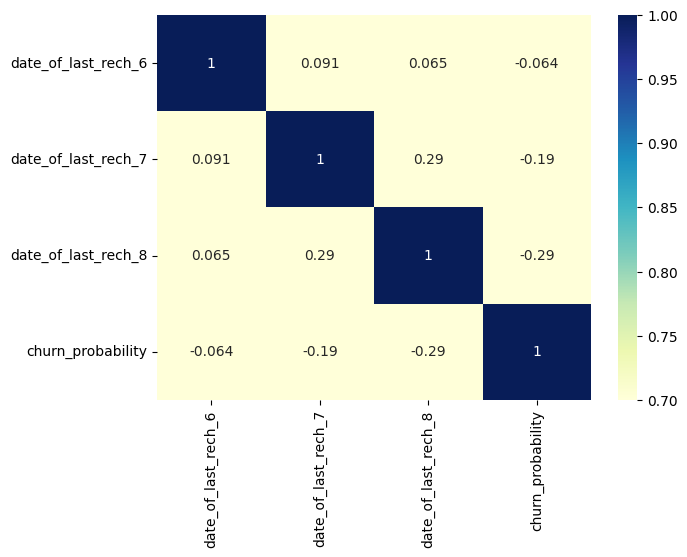

In [25]:
plt.figure(figsize=(7,5))
fortest = pd.concat([churn_categorical, y], axis=1)
# heatmap
sns.heatmap(fortest.corr(), cmap="YlGnBu", annot=True, vmin=0.7)
plt.show()

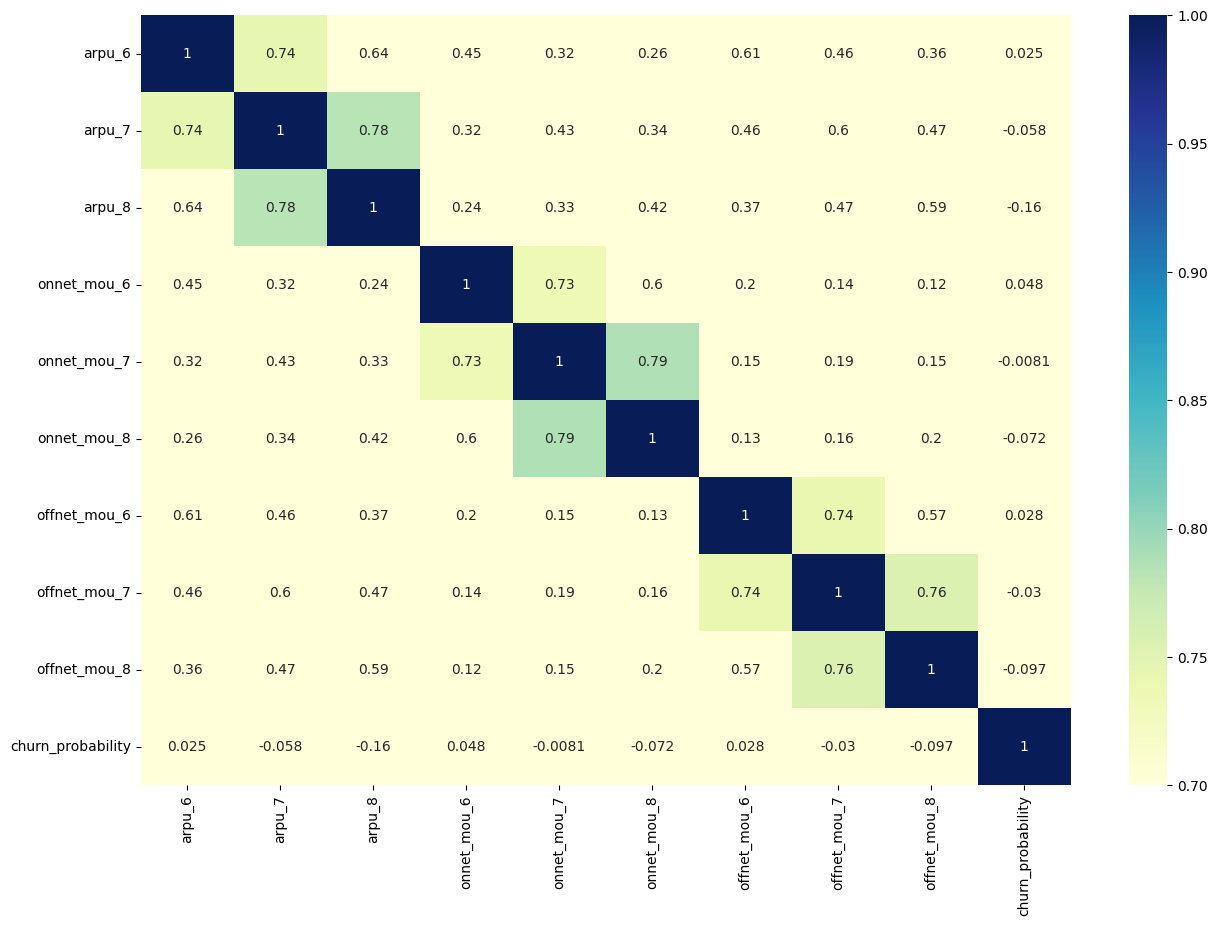

In [26]:
plt.figure(figsize=(15,10))
fortest = pd.concat([totals, y], axis=1)
# heatmap
sns.heatmap(fortest.corr(), cmap="YlGnBu", annot=True, vmin=0.7)
plt.show()

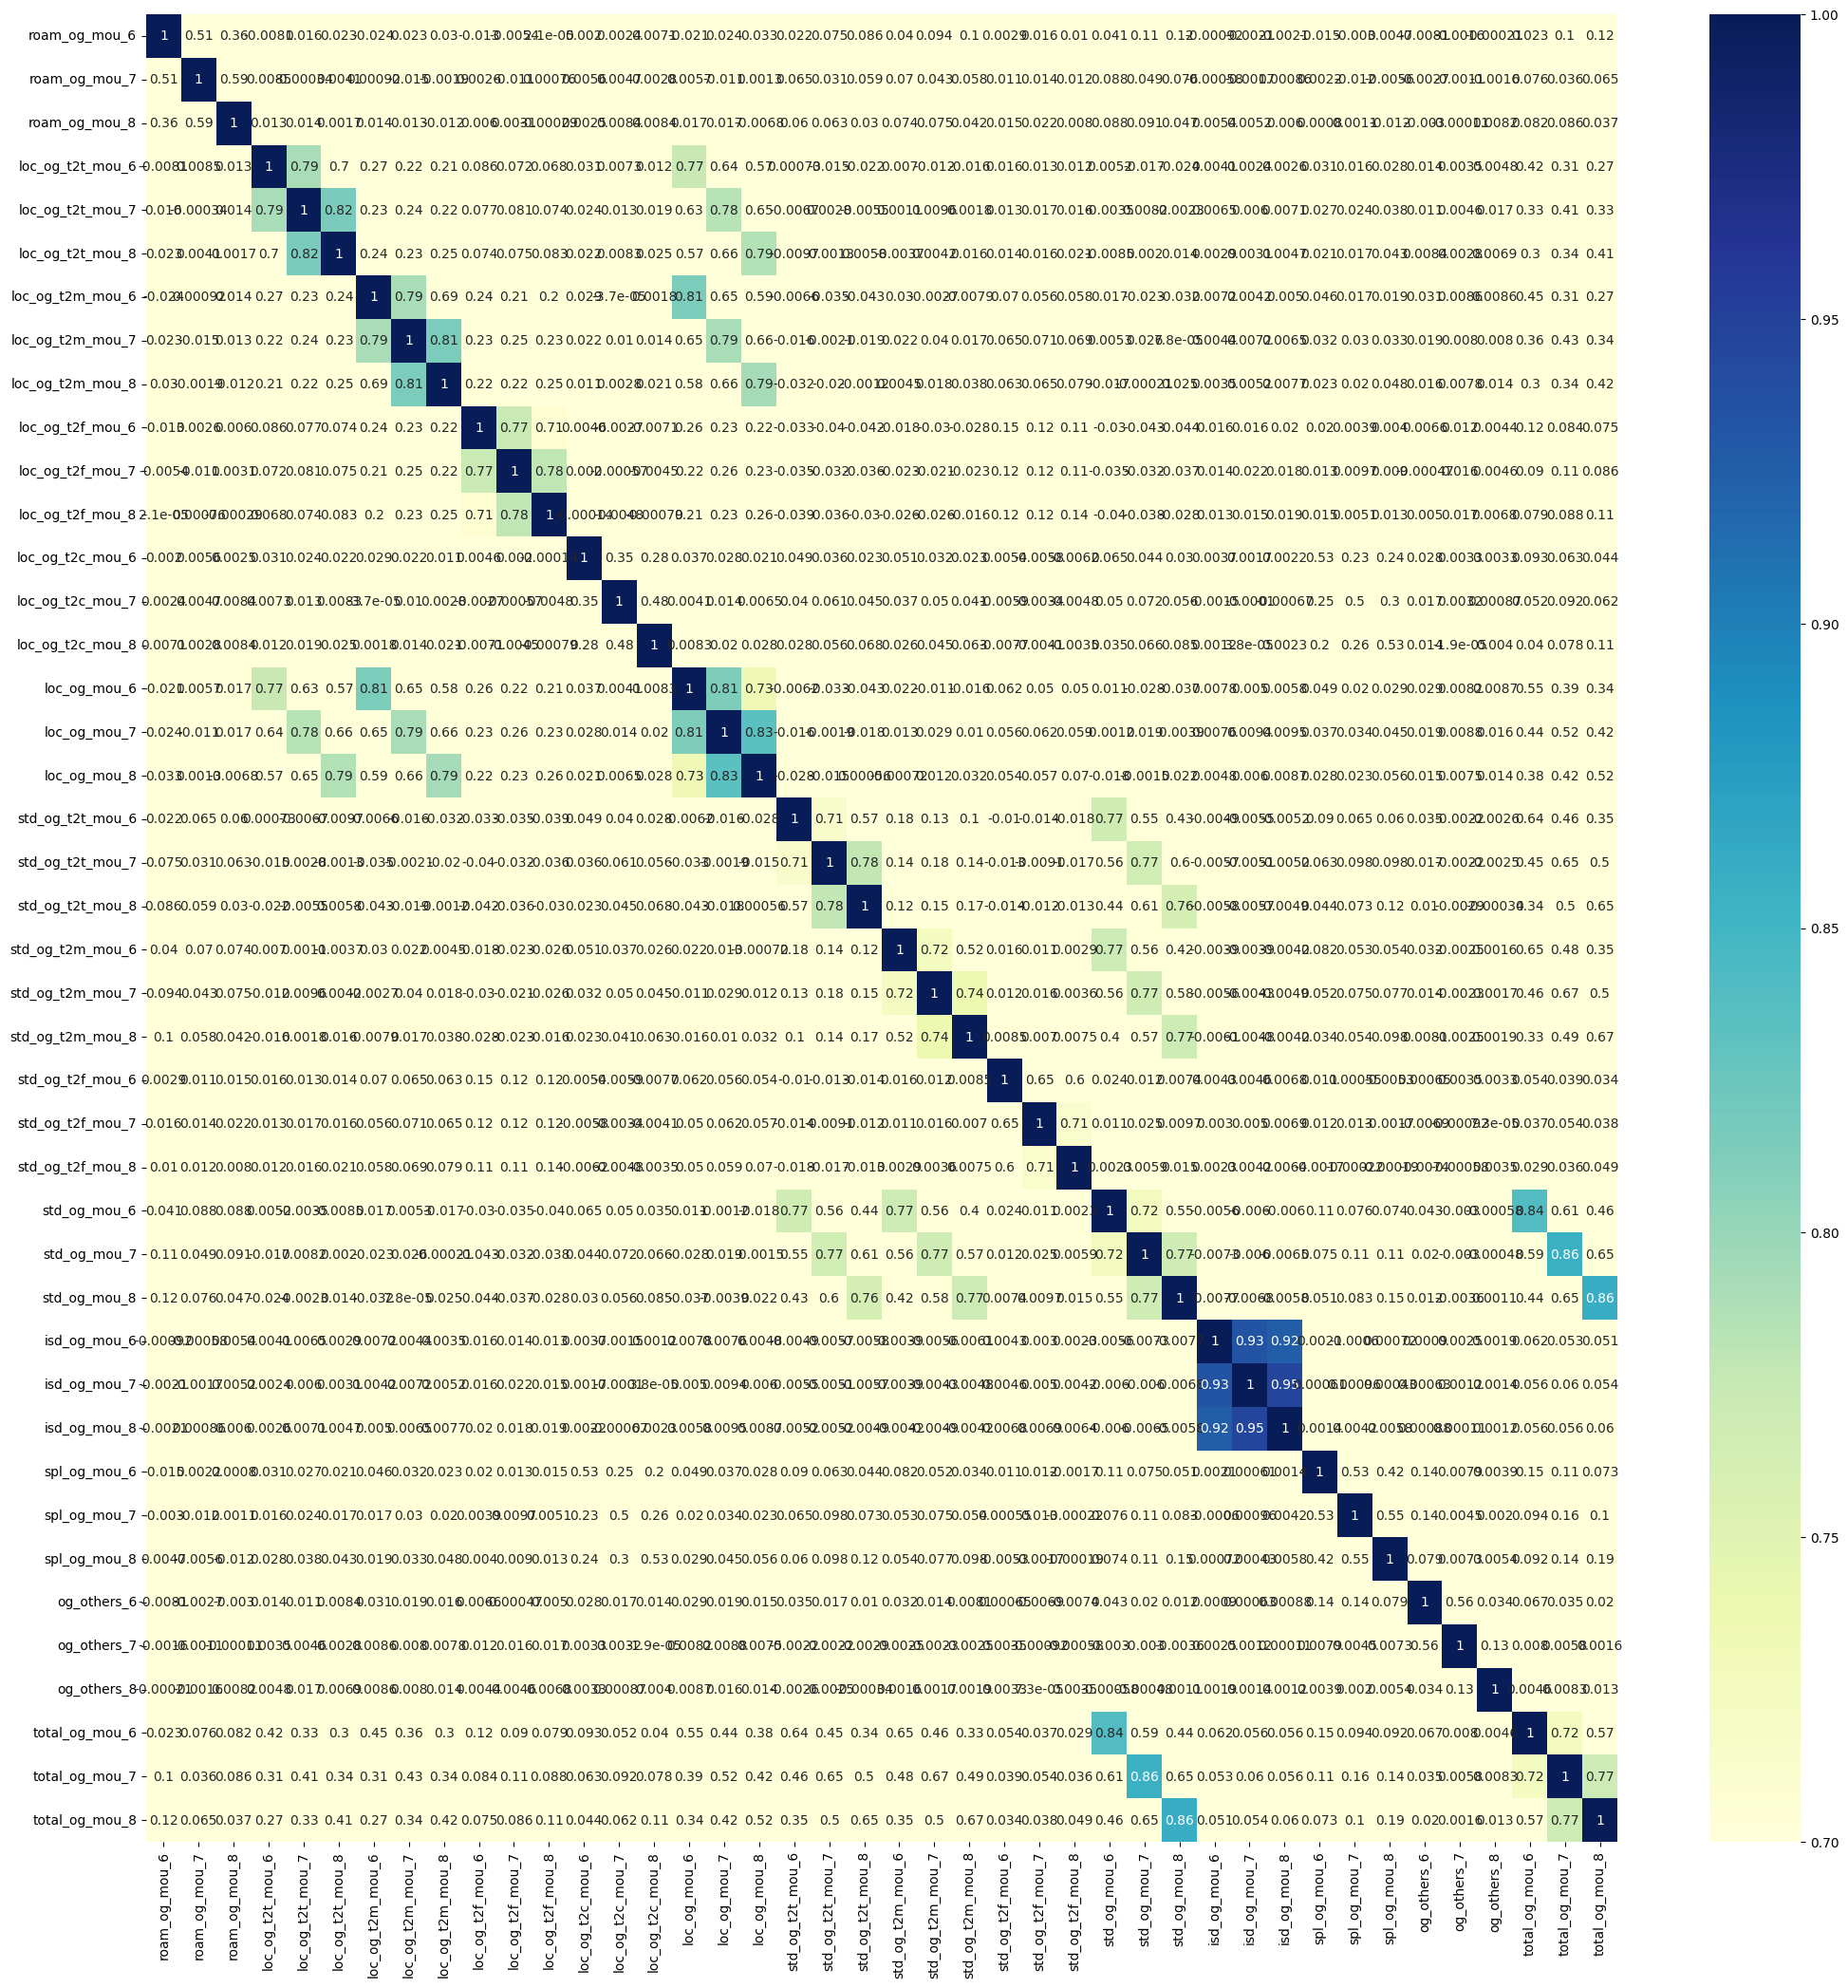

In [27]:
plt.figure(figsize=(25,25))
fortest = pd.concat([mobiledata, y], axis=1)
# heatmap
sns.heatmap(og.corr(), cmap="YlGnBu", annot=True, vmin=0.7)
plt.show()

Lots of correlations in several variables across months 6, 7 and 8, so we'll drop variables with correlation higher than 85%.

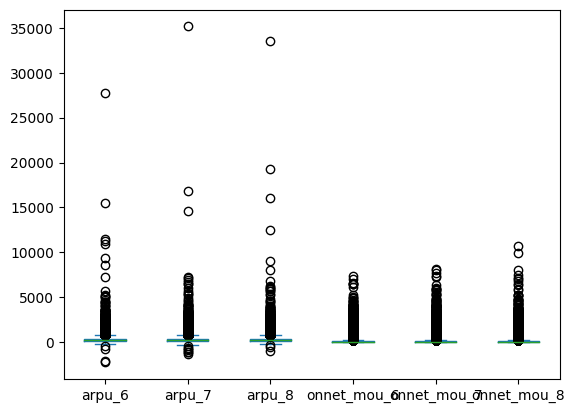

In [28]:
fortest = pd.concat([totals, y], axis=1)
fortest.plot.box(x='churn_probability', y=['arpu_6', 'arpu_7', 'arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8'])
plt.show()

In [29]:
# Create correlation matrix
corr_matrix =train.corr(numeric_only=True).abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [30]:
# Find index of feature columns with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(to_drop)

['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_7', 'total_og_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']


In [31]:
train = train.drop(to_drop, axis=1)
train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,18.75,0.00,0.0,0.0,65.09,204.99,1.01,0.00,8.20,0.63,0.00,0.38,0.0,0.0,81.21,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3,2,2,65,65,10,65,65,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.00,0.00,0.00,1.0,1.0,1.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,30.73,31.66,0.00,0.0,0.0,0.00,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,0,0,0.00,352.91,0.00,0.00,3.96,0.00,0,0,0,0,0,0,0,1,0,0,0,0,710,0.00,0.00,0.00,1.0,1.0,1.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,28.94,0.00,0.0,0.0,28.94,84.99,0.00,0.00,2.89,1.38,0.00,0.00,0.0,0.0,56.49,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.25,2,4,2,70,70,0,70,50,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,882,0.00,0.00,0.00,1.0,1.0,1.0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,15.33,0.56,0.0,0.0,16.16,37.99,4.60,0.00,14.95,9.13,25.61,0.00,0.0,0.0,76.03,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2,4,3,110,110,50,110,110,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,982,0.00,0.00,0.00,1.0,1.0,1.0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,4.35,0.00,0.0,0.0,4.35,0.00,0.00,0.00,0.00,17.00,0.00,0.00,0.0,0.0,63.26,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,13,10,8,50,41,30,25,10,30,390.80,308.89,213.47,

### [4] Scaling & Feature Engineering

Scaling the data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
x = scaler.fit_transform(train)

In [34]:
x.shape

(69999, 109)

Applying PCA on the data

In [35]:
from sklearn.decomposition import PCA
pca1 = PCA(random_state=42)
train_pca = pca1.fit(train)

In [36]:
pca1.components_

array([[ 2.39325941e-01,  2.49428796e-01,  2.30764183e-01, ...,
         5.93101578e-06,  6.79627970e-06,  1.20585971e-05],
       [ 8.61802077e-02,  8.86402206e-02,  8.88058753e-02, ...,
         7.08839328e-06,  4.78454107e-06,  5.46074936e-06],
       [-2.62717509e-02, -1.97115538e-02, -1.16794475e-02, ...,
        -6.69764276e-07,  7.65413168e-07,  1.48497684e-06],
       ...,
       [-1.20171351e-07,  1.35129778e-07,  1.41640704e-07, ...,
        -2.38201538e-04,  2.24034913e-04,  3.36905970e-04],
       [-2.80618383e-07,  1.44184819e-09,  1.04799596e-07, ...,
        -8.58474244e-05,  1.33902191e-04,  1.09567916e-04],
       [-8.80062702e-08,  2.62117591e-07, -1.60553481e-07, ...,
        -3.08319213e-05,  1.00932513e-04,  4.33642183e-05]])

In [37]:
pca1.explained_variance_ratio_

array([2.12832400e-01, 2.02176215e-01, 1.77824690e-01, 7.13893089e-02,
       4.56668097e-02, 4.17285965e-02, 3.04867333e-02, 2.72533437e-02,
       2.46500444e-02, 2.00350458e-02, 1.91860487e-02, 1.61828678e-02,
       1.31823551e-02, 1.01809711e-02, 8.16979355e-03, 7.61071470e-03,
       5.72614626e-03, 5.35158507e-03, 5.21630942e-03, 4.30950165e-03,
       4.16100510e-03, 3.78855768e-03, 3.55774382e-03, 3.39247540e-03,
       3.26298629e-03, 3.15203676e-03, 2.84124253e-03, 2.48358884e-03,
       2.40155658e-03, 2.16557835e-03, 2.01975426e-03, 1.88403971e-03,
       1.86740599e-03, 1.55689690e-03, 1.23960659e-03, 1.09819937e-03,
       9.98227726e-04, 9.38621165e-04, 8.64077649e-04, 7.98595343e-04,
       7.02909857e-04, 6.67601045e-04, 6.40757132e-04, 5.87486679e-04,
       4.90901846e-04, 3.96203134e-04, 3.45042692e-04, 3.08356436e-04,
       2.81827731e-04, 2.66103089e-04, 2.49460393e-04, 1.63415091e-04,
       1.49162161e-04, 1.37796628e-04, 1.37139872e-04, 1.28345298e-04,
      

<BarContainer object of 109 artists>

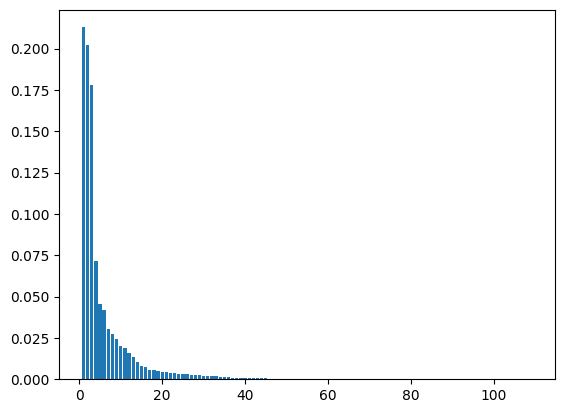

In [38]:
import matplotlib.pyplot as plt
plt.bar(range(1,len(pca1.explained_variance_ratio_)+1), pca1.explained_variance_ratio_)

Making the scree plot

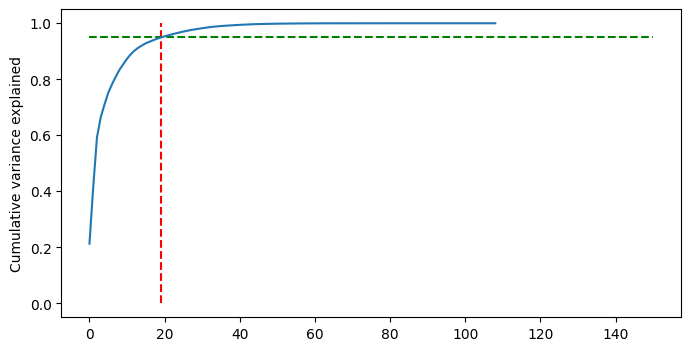

In [39]:
var_cumu = np.cumsum(pca1.explained_variance_ratio_)

fig = plt.figure(figsize=[8,4])
plt.vlines(x=19, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

- 95% of the variance is explained by 19 features

PCA with 20 components

In [40]:
from sklearn.decomposition import IncrementalPCA
pca2 = IncrementalPCA(n_components=20)

In [41]:
newdata = pca2.fit_transform(x)

In [42]:
newdata.shape

(69999, 20)

In [43]:
corrmat = np.corrcoef(newdata.transpose())
corrmat.shape

(20, 20)

<Axes: >

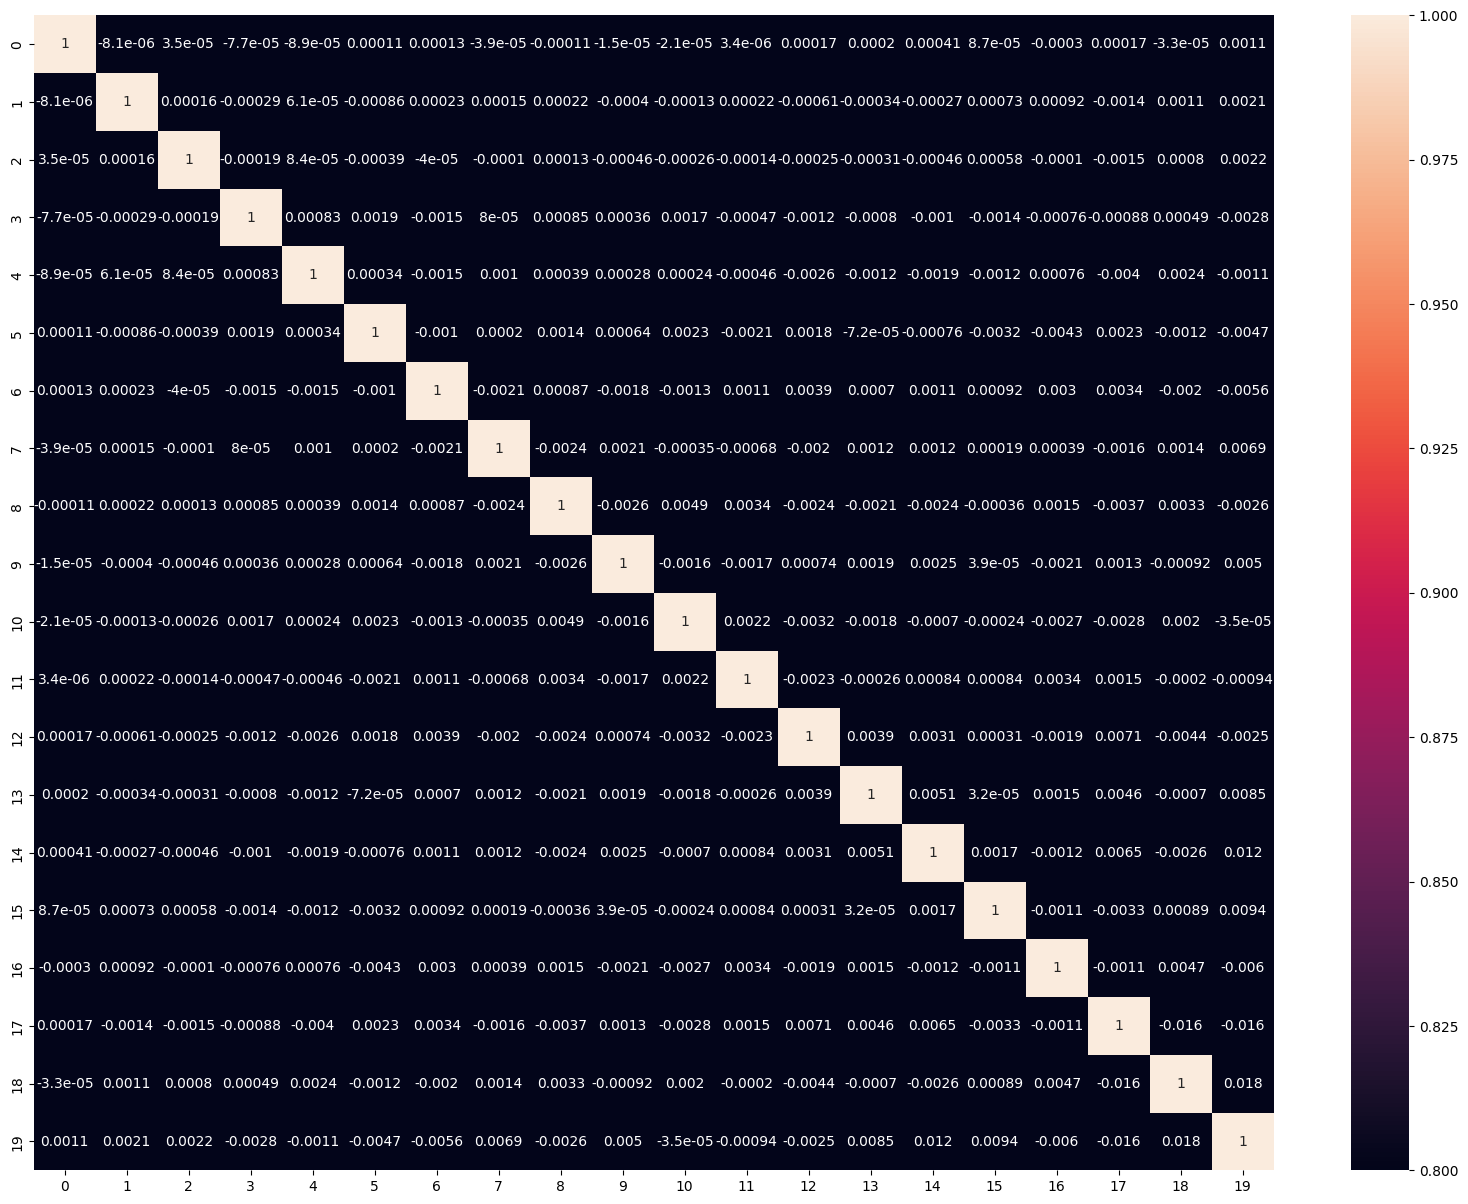

In [44]:
plt.figure(figsize=[20,15])
sns.heatmap(corrmat, annot=True, vmin=0.8)

PCA has successfully selected the most 20 features with no single correlation across all of them.

### [5] Model Building & Evaluation

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, r2_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import HalvingGridSearchCV, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [46]:
def evaluate_model(actual, pred):
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

#### [5.1] Testing with PCA applied

In [107]:
# Splitting train data set after performing PCA and selecting 20 features
X = newdata[: len(newdata)]
X_test = newdata[len(newdata) :]

In [108]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape, y_train.shape, X_val.shape,y_val.shape, X_test.shape)

(55999, 20) (55999,) (14000, 20) (14000,) (0, 20)


HistGradient Boosting

In [111]:
hgbm = HistGradientBoostingClassifier()

params = {
        'max_iter':[40],
        'max_leaf_nodes': [25],
        'min_samples_leaf': [8],
        'max_depth': [10]
        }
folds = 3

#hgbm = GridSearchCV(estimator=hgbm, cv=folds, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=1)

hgbm.fit(X_train, y_train)
hgbm.score(X_train, y_train)

0.9245343666851193

In [113]:
y_pred_hgbm= hgbm.predict(X_val)
evaluate_model(y_val, y_pred_hgbm)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_hgbm))

Accuracy Score :  91.63
ROC AUC score :  66.81
Precision score :  66.36
Recall score :  35.65

Confusion Matrix:
[[12321   257]
 [  915   507]]


##### Logistic Regression

In [54]:
# Logistic Regression
logreg = LogisticRegression()

params = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'max_iter' : [100, 500, 1000]
    }]

lr = HalvingGridSearchCV(
    estimator=logreg,
    cv=StratifiedKFold(5, shuffle=True, random_state=42),
    scoring="accuracy",
    param_grid= params,
    verbose=True,
    n_jobs=-1   
)

lr.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 691
max_resources_: 55999
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 180
n_resources: 691
Fitting 5 folds for each of 180 candidates, totalling 900 fits
----------
iter: 1
n_candidates: 60
n_resources: 2073
Fitting 5 folds for each of 60 candidates, totalling 300 fits
----------
iter: 2
n_candidates: 20
n_resources: 6219
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 3
n_candidates: 7
n_resources: 18657
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 4
n_candidates: 3
n_resources: 55971
Fitting 5 folds for each of 3 candidates, totalling 15 fits


HalvingGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                    estimator=LogisticRegression(), n_jobs=-1,
                    param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                 'max_iter': [100, 500, 1000],
                                 'penalty': ['l1', 'l2', 'elasticnet']}],
                    scoring='accuracy', verbose=True)

In [55]:
lr.best_estimator_

LogisticRegression(C=29.763514416313132, max_iter=1000)

In [57]:
y_pred_lr = lr.predict(X_val)
evaluate_model(y_val, y_pred_lr)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_lr))

Accuracy Score :  90.76
ROC AUC score :  58.78
Precision score :  66.08
Recall score :  18.64

Confusion Matrix:
[[12442   136]
 [ 1157   265]]


##### RandomForest

In [ ]:
# Trying RandomForest
forest = RandomForestClassifier()

params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

folds = 5

rfcv = GridSearchCV(estimator=forest, cv=folds, param_grid=params,
                    scoring='accuracy', n_jobs=-1, verbose=1)

rfcv.fit(X_train, y_train)

In [60]:
y_pred_rf = rfcv.predict(X_val)
evaluate_model(y_val, y_pred_rf)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_rf))

Accuracy Score :  91.71
ROC AUC score :  64.57
Precision score :  71.5
Recall score :  30.52

Confusion Matrix:
[[12405   173]
 [  988   434]]


In [61]:
rfcv.best_estimator_

RandomForestClassifier(criterion='entropy')

##### XGBoost

In [65]:
xg = xgb.XGBClassifier()

params = {
        'n_estimators' : [25, 50, 100, 200, 500], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'max_depth': [3, 4, 5, 10, 12]
        }
folds = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)

xg = HalvingGridSearchCV(estimator=xg, cv=folds, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=1)

xg.fit(X_train, y_train)

n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 25
max_resources_: 55999
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 2500
n_resources: 25
Fitting 5 folds for each of 2500 candidates, totalling 12500 fits


----------
iter: 1
n_candidates: 834
n_resources: 75
Fitting 5 folds for each of 834 candidates, totalling 4170 fits
----------
iter: 2
n_candidates: 278
n_resources: 225
Fitting 5 folds for each of 278 candidates, totalling 1390 fits
----------
iter: 3
n_candidates: 93
n_resources: 675
Fitting 5 folds for each of 93 candidates, totalling 465 fits
----------
iter: 4
n_candidates: 31
n_resources: 2025
Fitting 5 folds for each of 31 candidates, totalling 155 fits
----------
iter: 5
n_candidates: 11
n_resources: 6075
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 6
n_candidates: 4
n_resources: 18225
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 7
n_candidates: 2
n_resources: 54675
Fitting 5 folds for each of 2 candidates, totalling 10 fits


HalvingGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                    estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importa...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...),
                    n_jobs=-1,
                    param_grid={'gamma': [0.1, 0.5, 1, 1.5, 5],
                                'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.25],
                                'max_depth': [3, 4, 5, 10, 12],
                                'min_child_weight': [1, 5, 7, 10],
                                'n_estimators': [25, 50, 100, 200, 500]},
                    scoring='accuracy', verbose=1)

In [78]:
y_pred_xg = xg.predict(X_val)
evaluate_model(y_val, y_pred_xg)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_xg))

Accuracy Score :  91.58
ROC AUC score :  66.12
Precision score :  66.67
Recall score :  34.18

Confusion Matrix:
[[12335   243]
 [  936   486]]


Random Forest Classifier and XG Boost are the best performers, so we'll pick any of them to run on the test set provided in the assignment

#### [5.2]: Modeling on all features without PCA

In [127]:
# Modeling on the original dataframe after cleaning, without PCA
X = train[: len(train)]
X_test = train[len(train) :]

In [128]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
print(X_train.shape, y_train.shape, X_val.shape,y_val.shape, X_test.shape)

(55999, 109) (55999,) (14000, 109) (14000,) (0, 109)


In [129]:
hgbm = HistGradientBoostingClassifier(random_state=42)

params = {
        'max_iter':[10, 20, 30],
        'max_leaf_nodes': [1, 5, 10, 15],
        'min_samples_leaf': [1, 3, 5],
        'max_depth': [3, 4, 5, 10, 12]
        }
folds = 5

hgbm = GridSearchCV(estimator=hgbm, cv=folds, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=1)

hgbm.fit(X_train, y_train)
hgbm.score(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


0.9425346881194308

In [130]:
hgbm.best_estimator_

HistGradientBoostingClassifier(max_depth=10, max_iter=30, max_leaf_nodes=15,
                               min_samples_leaf=5, random_state=42)

In [131]:
y_pred_hgbm= hgbm.predict(X_val)
evaluate_model(y_val, y_pred_hgbm)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_hgbm))

Accuracy Score :  94.11
ROC AUC score :  79.73
Precision score :  76.83
Recall score :  61.6

Confusion Matrix:
[[12283   269]
 [  556   892]]


##### Logistic Regression

In [49]:
logreg = LogisticRegression(solver='lbfgs')

params = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'max_iter' : [100, 500, 1000, 2000],
    }]

lr = HalvingGridSearchCV(
    estimator=logreg,
    cv=StratifiedKFold(5, shuffle=True, random_state=42),
    scoring="accuracy",
    param_grid= params,
    verbose=True,
    n_jobs=-1   
)

lr.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 691
max_resources_: 55999
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 240
n_resources: 691
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/home/zinger/Documents/upgrad/TelecomChurn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zinger/Documents/upgrad/TelecomChurn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

----------
iter: 1
n_candidates: 80
n_resources: 2073
Fitting 5 folds for each of 80 candidates, totalling 400 fits


/home/zinger/Documents/upgrad/TelecomChurn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zinger/Documents/upgrad/TelecomChurn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

----------
iter: 2
n_candidates: 27
n_resources: 6219
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/home/zinger/Documents/upgrad/TelecomChurn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zinger/Documents/upgrad/TelecomChurn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

----------
iter: 3
n_candidates: 9
n_resources: 18657
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/zinger/Documents/upgrad/TelecomChurn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zinger/Documents/upgrad/TelecomChurn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

----------
iter: 4
n_candidates: 3
n_resources: 55971
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/home/zinger/Documents/upgrad/TelecomChurn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zinger/Documents/upgrad/TelecomChurn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                    estimator=LogisticRegression(), n_jobs=-1,
                    param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                 'max_iter': [100, 500, 1000, 2000],
                                 'penalty': ['l1', 'l2', 'elasticnet']}],
                    scoring='accuracy', verbose=True)

In [50]:
lr.best_estimator_
lr.best_params_

{'C': 0.615848211066026, 'max_iter': 1000, 'penalty': 'l2'}

In [51]:
y_pred_lr= lr.predict(X_val)
evaluate_model(y_val, y_pred_lr)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_lr))

Accuracy Score :  93.06
ROC AUC score :  71.91
Precision score :  78.63
Recall score :  45.23

Confusion Matrix:
[[12374   178]
 [  793   655]]


##### RandomForest

In [132]:
forest = RandomForestClassifier()

params = {
    #'max_depth': [40],
    #'min_samples_leaf': [5],
    'criterion': ['gini', 'entropy'],
    'max_features': [0.6],
    'n_estimators': [300]
}

folds = 3

rfcv = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=1)

rfcv.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [0.6], 'n_estimators': [300]},
             scoring='accuracy', verbose=1)

In [134]:
rfcv.score(X_train, y_train)

1.0

In [135]:
print(rfcv.best_estimator_)
print(rfcv.best_score_)
print(rfcv.best_params_)

RandomForestClassifier(criterion='entropy', max_features=0.6, n_estimators=300)
0.9412310895483026
{'criterion': 'entropy', 'max_features': 0.6, 'n_estimators': 300}


In [136]:
y_pred_rf = rfcv.predict(X_val)
evaluate_model(y_val, y_pred_rf)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_rf))

Accuracy Score :  94.16
ROC AUC score :  79.76
Precision score :  77.36
Recall score :  61.6

Confusion Matrix:
[[12291   261]
 [  556   892]]


##### XGBoost

In [137]:
xg = xgb.XGBClassifier()

params = {
        'n_estimators' : [100, 200, 500], # no of trees 
        'learning_rate' : [0.01, 0.05, 0.1],  # eta
        'max_depth': [3, 4, 5]
        }
folds = 3

xgcv = HalvingGridSearchCV(estimator=xg, cv=folds, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=1)

xgcv.fit(X_train, y_train)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 2074
max_resources_: 55999
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 27
n_resources: 2074
Fitting 3 folds for each of 27 candidates, totalling 81 fits
----------
iter: 1
n_candidates: 9
n_resources: 6222
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 2
n_candidates: 3
n_resources: 18666
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 3
n_candidates: 1
n_resources: 55998
Fitting 3 folds for each of 1 candidates, totalling 3 fits


HalvingGridSearchCV(cv=3,
                    estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rat...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...),
                    n_jobs=-1,
                    param_grid={'learning_rate': [0.01, 0.05, 0.1],
                                'max_depth': [3, 4, 5],
                                'n_estimators': [100, 200, 500]},
                    scoring='accuracy', verbose=1)

In [138]:
print(xgcv.best_estimator_)
print(xgcv.best_params_)
print(xgcv.best_score_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
0.93958496298139


In [139]:
y_pred_xg = xgcv.predict(X_val)
evaluate_model(y_val, y_pred_xg)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_xg))

Accuracy Score :  94.04
ROC AUC score :  78.81
Precision score :  77.61
Recall score :  59.6

Confusion Matrix:
[[12303   249]
 [  585   863]]


##### Gradient Boost

In [140]:
gb = GradientBoostingClassifier()

gb_params ={
     'n_estimators': [100, 300, 500],   # no of Trees 
     'learning_rate' : [0.01, 0.1, 0.5],
     'max_depth': [5, 8, 11],
     'max_features' : [4, 9, 13],
 }
#GradientBoostingClassifier(**gb_params)
gbcv = HalvingGridSearchCV(estimator = gb, param_grid = gb_params, 
                        scoring= 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                       return_train_score=True)   
gbcv.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 691
max_resources_: 55999
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 81
n_resources: 691
Fitting 5 folds for each of 81 candidates, totalling 405 fits
----------
iter: 1
n_candidates: 27
n_resources: 2073
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 2
n_candidates: 9
n_resources: 6219
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 3
n_candidates: 3
n_resources: 18657
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 4
n_candidates: 1
n_resources: 55971
Fitting 5 folds for each of 1 candidates, totalling 5 fits


HalvingGridSearchCV(estimator=GradientBoostingClassifier(),
                    param_grid={'learning_rate': [0.01, 0.1, 0.5],
                                'max_depth': [5, 8, 11],
                                'max_features': [4, 9, 13],
                                'n_estimators': [100, 300, 500]},
                    scoring='accuracy', verbose=1)

In [141]:
print(gbcv.best_estimator_)
print(gbcv.best_params_)
print(gbcv.best_score_)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features=4,
                           n_estimators=500)
{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 4, 'n_estimators': 500}
0.9409494508942384


In [142]:
y_pred_gb = gbcv.predict(X_val)
evaluate_model(y_val, y_pred_gb)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_gb))

Accuracy Score :  94.11
ROC AUC score :  78.51
Precision score :  78.82
Recall score :  58.84

Confusion Matrix:
[[12323   229]
 [  596   852]]


##### Decision Tree

In [143]:
# Trying DecisionTree
dt = DecisionTreeClassifier()

params = {
    'min_samples_leaf': [1, 5, 10, 50],
    'criterion': ["gini", "entropy"],
    "max_depth": [5,10,20],
}
dtcv = GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced'),
                           param_grid=params,
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")


In [144]:
dtcv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 5, 10, 50]},
             scoring='accuracy', verbose=1)

In [145]:
print(dtcv.best_estimator_)
print(dtcv.best_params_)
print(dtcv.best_score_)

DecisionTreeClassifier(class_weight='balanced', max_depth=20)
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1}
0.908159087864988


In [146]:
y_pred_dt = dtcv.predict(X_val)
evaluate_model(y_val, y_pred_dt)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_dt))


Accuracy Score :  90.94
ROC AUC score :  81.84
Precision score :  54.81
Recall score :  70.37

Confusion Matrix:
[[11712   840]
 [  429  1019]]


##### SVC

In [150]:
# SVC
# specify range of parameters (C) as a list
params = {"C": [0.1, 10, 100]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
svc = HalvingGridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                       return_train_score=True)      

svc.fit(X_train, y_train)


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 18666
max_resources_: 55999
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 18666
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 1
n_candidates: 1
n_resources: 55998
Fitting 3 folds for each of 1 candidates, totalling 3 fits


HalvingGridSearchCV(cv=3, estimator=SVC(), param_grid={'C': [0.1, 10, 100]},
                    scoring='accuracy', verbose=1)

In [151]:
y_pred_svc = svc.predict(X_val)
evaluate_model(y_val, y_pred_svc)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_svc))

Accuracy Score :  92.97
ROC AUC score :  70.67
Precision score :  80.21
Recall score :  42.54

Confusion Matrix:
[[12400   152]
 [  832   616]]


After testing `7` models, HistGBM scored the highest.

### [6] Validating Models on Test data set

#### [6.1] Preparing Test dataset

In [ ]:
test = pd.read_csv('test.csv')
# Dropping IDs
df_test = test.drop(columns=['id','circle_id'], axis = 1)
# Dropping features with unique variables
for col in df_test:
    if df_test[col].nunique() == 1:
        del df_test[col]
# Counting Null values
col_list_test = list(df_test)
na = []
for i in df_test.isna().sum()*100/df_test.shape[0]:
    na.append(i)
data = {'cols': col_list_test, '% na': na}
test_na = pd.DataFrame(data)
test_na[test_na['% na'] != 0]
# Dropping columns with more than 70% null values
null_cols_test = test_na[(test_na['% na'] >= 70)]
df_test = df_test.drop(null_cols_test.cols.values, axis=1)
# Filling other columns with median and mean depending on their type
for col in df_test:
    if df_test[col].dtype == 'float':
        df_test[col] = df_test[col].fillna(df_test[col].median())
    if df_test[col].dtype == 'int':
        df_test[col] = df_test[col].fillna(df_test[col].mean())
# Handling categorical variables
churn_categorical_test = df_test.select_dtypes(include=['object'])
churn_categorical_test = churn_categorical_test.astype('datetime64[ns]')
# Converting to binary
for col in churn_categorical_test:
    if churn_categorical_test[col].any != 0:
        churn_categorical_test[col] = churn_categorical_test[col].dt.day
        churn_categorical_test.loc[churn_categorical_test[col] > 0, [col]] = 1
    churn_categorical_test[col] = churn_categorical_test[col].fillna(0) 
# Dropping uncleaned categorical variables, and merging cleaned ones
df_test = df_test.drop(df_test.select_dtypes(include=['object']), axis=1)
df_test = pd.concat([df_test, churn_categorical_test], axis=1)
# Dropping highly correlated features (>85%)
df_test = df_test.drop(to_drop, axis=1)
# Print final shape
print('Total null values is:', df_test.isna().sum().sum())
print(df_test.shape)


Total null values is: 0
(30000, 109)


In [ ]:
test_pca = pca2.transform(df_test)
test_pca.shape

(30000, 20)

#### [6.2] Predicting on Test dataset

Using HistGBM on test data

In [120]:
predictions = hgbm.predict(df_test)
predictions

array([0, 0, 1, ..., 0, 0, 0])

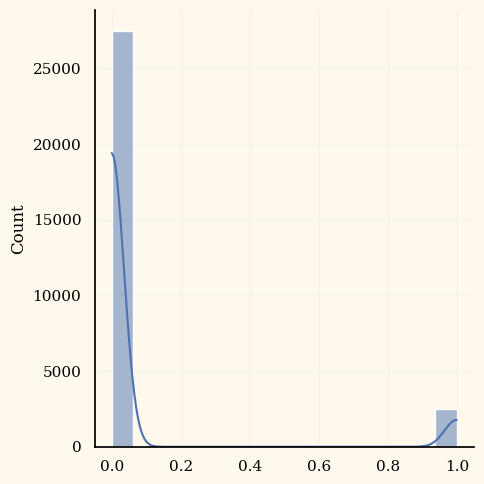

In [121]:
sns.displot(predictions, kde=True)

In [122]:
unique, counts = np.unique(predictions, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 27477]
 [    1  2523]]


Exporting results

In [123]:
submission = pd.read_csv('sample (2).csv')
submission['churn_probability'] = predictions
submission.to_csv('submission_hgbm.csv', index=False)
submission = pd.read_csv('submission_hgbm.csv')
submission

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


In [124]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL
def plot_count(df: pd.core.frame.DataFrame, col_list: list, title_name: str='Train') -> None:

    f, ax = plt.subplots(len(col_list), 2, figsize=(10, 4))
    plt.subplots_adjust(wspace=0)
    
    s1 = df[col_list].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#9E3F00', '#eb5e00', '#ff781f', '#ff9752', '#ff9752']
    inner_colors = ['#ff6905', '#ff8838', '#ffa66b']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90,frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={ 'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size':13, 
        'weight': 'bold', 
        'color':'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%',explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', 
                               fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = [0, 1]
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette='YlOrBr_r', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i+0.1, str(v), color='black', 
                     fontweight='bold', fontsize=12)

#     plt.title(col_list)
    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col_list, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name} Dataset', fontsize=20, fontweight='bold')
    plt.tight_layout()    
#     plt.savefig('data/plot_count.png')
    plt.show()

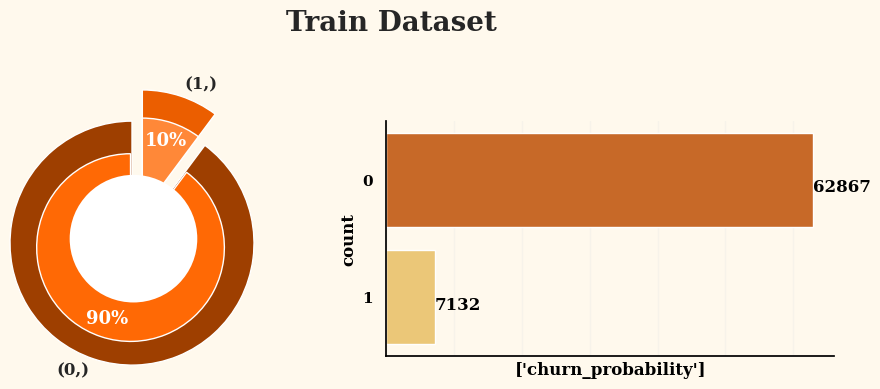

In [125]:
data = pd.read_csv('train.csv')
plot_count(data, ['churn_probability'])

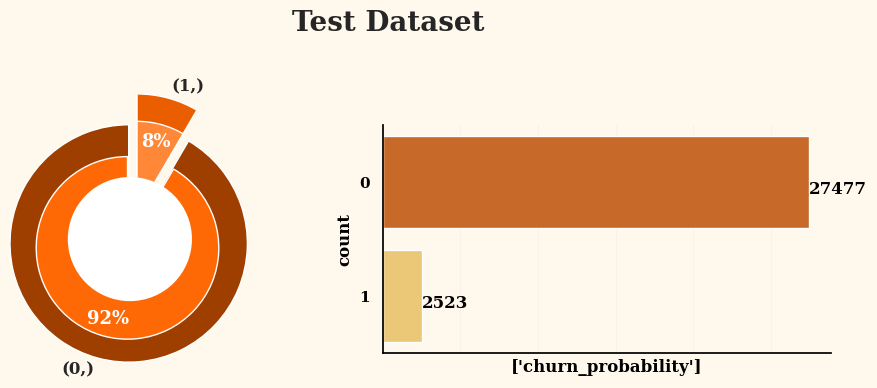

In [126]:
test_final = pd.merge(test, submission, how='inner', on='id')
plot_count(test_final, ['churn_probability'], title_name='Test')

### Observations:
- PCA helped in reducing the features to just 20, but didn't perform well on accuracy (less than `92%`).
- Running the models on all features after cleaning data, resulted in much higher accuracy (exceeded `94%`).
- With HistGradientBoosting scoring the highest accuracy of `94.73%`, it was used to predit the test set.